No handles with labels found to put in legend.


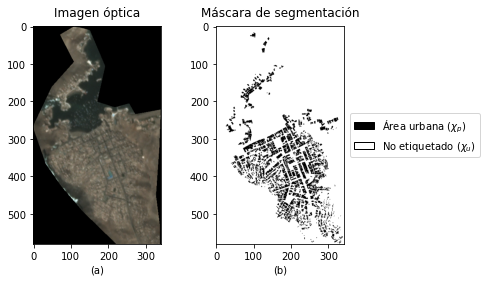

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from osgeo import ogr,osr,gdal
import os, glob
import cv2
from matplotlib.patches import Rectangle
def LoadData(path):
    raster = os.path.join(path)
    src = gdal.Open(raster)
    cols = src.RasterXSize
    rows = src.RasterYSize
    band = src.GetRasterBand(1)
    array= band.ReadAsArray()
    array=array.astype('uint8')
    return cols,rows,array
def OpticalData(path):
    raster = os.path.join(path)
    src = gdal.Open(raster)
    cols = src.RasterXSize
    rows = src.RasterYSize
    band1= src.GetRasterBand(1).ReadAsArray()
    band2= src.GetRasterBand(2).ReadAsArray()
    band3= src.GetRasterBand(3).ReadAsArray()
    array=np.zeros((rows,cols,3))
    array[:,:,0]=band3/np.max(band3)*255
    array[:,:,1]=band2/np.max(band2)*255
    array[:,:,2]=band1/np.max(band1)*255
    array=array.astype('uint8')
    return cols,rows,array

cols,rows,array=LoadData("PUCUSANA_UNIDO_8May18.tif")
cols2,rows2,array2=OpticalData("20180508_155719_1054_3B_AnalyticMS_SR_clip.tif")

fig, axs = plt.subplots(1, 2)

axs[0].imshow(array2, cmap="binary")
axs[0].set_title('Imagen óptica', pad=10)
axs[0].set_xlabel('(a)')
#axs[0].axis('off')
axs[1].imshow(array, cmap="binary")
axs[1].set_title('Máscara de segmentación', pad=10)
axs[1].set_xlabel('(b)')
axs[1].legend()
#axs[1].axis('off')
handles = [Rectangle((0, 0), 1, 1, fc="black", ec="black",label="Área urbana ($\chi_p$)"),
           Rectangle((0, 0), 1, 1, fc="white", ec="black",label="No etiquetado ($\chi_u$)")]
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.01, 0.5))

plt.savefig("Segmentación"+".png", dpi=600, bbox_inches='tight')